In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# 1. Загружаем и смотрим данные

In [97]:
train = pd.read_csv(r'train.csv')
train["Крайний срок"] = pd.to_datetime(train["Крайний срок"], format='%Y-%m-%d %H:%M')
train["Дата обращения"] = pd.to_datetime(train["Дата обращения"], format='%Y-%m-%d %H:%M')
train["Дата восстановления"] = pd.to_datetime(train["Дата восстановления"], format='%Y-%m-%d %H:%M')
train["Дата закрытия обращения"] = pd.to_datetime(train["Дата закрытия обращения"], format='%Y-%m-%d %H:%M')
train.head()

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:43:00,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:41:00,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51:00,2018-01-25 22:47:00,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47:00,2018-02-02 07:52:00,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50:00,2018-01-25 23:13:00,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55:00,2018-01-26 00:00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54:00,2018-02-04 07:53:00,4-Нет,4-Нет влияния,База,Место216


In [98]:
train.shape

(14803, 17)

In [99]:
train.columns

Index(['Содержание', 'Сервис', 'Приоритет', 'Статус', 'Функциональная группа',
       'Крайний срок', 'Дата обращения', 'Тип обращения на момент подачи',
       'Тип обращения итоговый', 'Решение             ',
       'Тип переклассификации', 'Дата восстановления',
       'Дата закрытия обращения', 'Критичность', 'Влияние', 'Система',
       'Место'],
      dtype='object')

Пользователь вводит данные колонок: 'Содержание', 'Приоритет', 'Тип обращения на момент подачи', 'Критичность', 'Влияние'

Автоматически генерируются колонки: 'Сервис', 'Крайний срок', 'Дата обращения', 'Система', 'Место'

После обработки специалист вводит данные колонок: 'Статус', 'Тип обращения итоговый', 'Решение             ', 'Тип переклассификации', 'Дата восстановления', 'Дата закрытия обращения', 'Функциональная группа'

In [100]:
for i in ['Сервис', 'Приоритет', 'Статус', 'Функциональная группа', 'Тип обращения на момент подачи',
          'Тип обращения итоговый', 'Тип переклассификации', 'Критичность', 'Влияние', 'Система', 'Место']:
    print(i)
    print(train[i].unique(), '\n')

Сервис
['АРМ' 'Сервис7' 'Сервис21' 'Сервис58' 'Сервис347' 'Сервис13' 'Сервис95'
 'Сервис205' 'Сервис12' 'Сервис71' 'Сервис2' 'Сервис154' 'Сервис41'
 'Сервис18' 'Сервис22' 'Сервис23' 'Сервис25' 'Сервис11' 'Сервис43'
 'Сервис287' 'Сервис64' 'Сервис158' 'Сервис26' 'Сервис73' 'Сервис92'
 'Сервис36' 'Сервис42' 'Сервис142' 'Сервис8' 'Сервис39' 'Сервис121'
 'Сервис61' 'Сервис77' 'Сервис99' 'Сервис320' 'Сервис93' 'Сервис66'
 'Сервис52' 'Сервис72' 'Сервис115' 'Сервис87' 'Сервис20' 'Сервис44'
 'Сервис138' 'Сервис48' 'Сервис17' 'Сервис161' 'Сервис132' 'Сервис136'
 'Сервис108' 'Сервис19' 'Сервис84' 'Сервис131' 'Сервис78' 'Сервис107'
 'Сервис125' 'Сервис185' 'Сервис223' 'Сервис9' 'Сервис181' 'Сервис37'
 'Сервис4' 'Сервис401' 'Сервис207' 'Сервис294' 'Сервис65' 'Сервис76'
 'Сервис54' 'Сервис171' 'Сервис31' 'Сервис104' 'Сервис133' 'Сервис415'
 'Сервис90' 'Сервис98' 'Сервис192' 'Сервис235' 'Сервис310' 'Сервис177'
 'Сервис50' 'Сервис119' 'Сервис130' 'Сервис118' 'Сервис47' 'Сервис57'
 'Сервис34' 'Сервис1

In [101]:
display(train.info())
display(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14803 entries, 0 to 14802
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Содержание                      14802 non-null  object        
 1   Сервис                          14803 non-null  object        
 2   Приоритет                       14803 non-null  object        
 3   Статус                          14803 non-null  object        
 4   Функциональная группа           14803 non-null  object        
 5   Крайний срок                    14803 non-null  datetime64[ns]
 6   Дата обращения                  14803 non-null  datetime64[ns]
 7   Тип обращения на момент подачи  14803 non-null  object        
 8   Тип обращения итоговый          14803 non-null  object        
 9   Решение                         14803 non-null  object        
 10  Тип переклассификации           14803 non-null  int64         
 11  Да

None

,Крайний срок,Дата обращения,Тип переклассификации,Дата восстановления,Дата закрытия обращения
count,14803,14803,14803.000000,14750,14426
mean,2018-02-10 22:44:20.132405760,2018-02-05 07:42:05.062487296,0.038911,2018-02-07 00:44:31.000678144,2018-02-12 19:22:49.922362368
min,2017-03-08 11:36:00,2018-01-19 09:27:00,0.000000,2018-01-25 22:47:00,2018-01-19 09:41:00
25%,2018-02-04 06:36:00,2018-01-31 14:41:00,0.000000,2018-02-01 12:19:15,2018-02-07 08:56:00
50%,2018-02-09 13:47:00,2018-02-04 06:53:00,0.000000,2018-02-07 06:28:30,2018-02-11 07:56:30
75%,2018-02-16 07:51:00,2018-02-10 11:22:00,0.000000,2018-02-11 12:21:45,2018-02-17 14:48:00
max,2018-08-26 07:12:00,2018-02-16 13:10:00,2.000000,2018-06-08 13:03:00,2018-06-09 08:18:00
std,NaN,NaN,0.258563,NaN,NaN


In [102]:
# Приемлемое количество пропусков
(train.isna().sum() / len(train) * 100).sort_values(ascending=False)

Дата закрытия обращения           2.546781
Дата восстановления               0.358036
Содержание                        0.006755
Решение                           0.000000
Система                           0.000000
Влияние                           0.000000
Критичность                       0.000000
Тип переклассификации             0.000000
Тип обращения итоговый            0.000000
Сервис                            0.000000
Тип обращения на момент подачи    0.000000
Дата обращения                    0.000000
Крайний срок                      0.000000
Функциональная группа             0.000000
Статус                            0.000000
Приоритет                         0.000000
Место                             0.000000
dtype: float64

In [103]:
# Пропуски в 'Дата закрытия обращения' из-за отмены обращения
print('Количество: ', train['Дата закрытия обращения'].isna().sum(), '\n', train.loc[train['Статус']=='Отменен', 'Дата закрытия обращения'].value_counts(dropna=False))

Количество:  377 
 Дата закрытия обращения
NaT                    377
2018-02-02 12:28:00      3
2018-02-02 09:19:00      2
2018-02-03 12:49:00      2
2018-01-19 09:43:00      1
2018-02-09 12:57:00      1
2018-02-05 17:23:00      1
2018-02-07 12:14:00      1
2018-02-08 06:29:00      1
2018-02-09 07:18:00      1
2018-02-08 15:08:00      1
2018-02-08 15:37:00      1
2018-02-09 03:38:00      1
2018-02-13 23:50:00      1
2018-02-09 10:45:00      1
2018-02-10 08:52:00      1
2018-02-07 06:40:00      1
2018-02-10 08:47:00      1
2018-02-10 09:17:00      1
2018-02-11 03:12:00      1
2018-02-11 10:52:00      1
2018-02-12 10:06:00      1
2018-02-17 05:10:00      1
2018-02-15 06:26:00      1
2018-02-16 06:22:00      1
2018-02-16 06:36:00      1
2018-02-16 06:34:00      1
2018-02-16 06:31:00      1
2018-02-05 11:26:00      1
2018-02-04 02:39:00      1
2018-02-04 03:39:00      1
2018-01-19 09:41:00      1
2018-01-26 01:38:00      1
2018-01-26 09:18:00      1
2018-01-26 09:26:00      1
2018-01-31 1

In [104]:
# Пропуски в 'Дата восстановления' из-за отмены обращения
print('Количество: ', train['Дата восстановления'].isna().sum(), '\n', train.loc[train['Статус']=='Отменен', 'Дата восстановления'].value_counts(dropna=False))

Количество:  53 
 Дата восстановления
NaT                    53
2018-02-09 05:22:00     6
2018-02-09 05:21:00     5
2018-02-11 14:35:00     4
2018-02-11 14:40:00     4
                       ..
2018-02-01 06:45:00     1
2018-01-31 13:18:00     1
2018-01-31 11:15:00     1
2018-02-01 08:37:00     1
2018-02-16 12:59:00     1
Name: count, Length: 320, dtype: int64


In [105]:
# А вот количество дубликатов напрягает... потом можно почистить и посмотреть на метрики
len(train[train.duplicated()]) / len(train)

0.10261433493210835

# 2. Задача переклассификации

Оценка корректности классификации записи (запрос/инцидент), так как большинство записей подается пользователями ИТ-решений в свободной форме и несет субъективную оценку конкретного заявителя, в которой важность и критичность данного обращения может быть как занижена, так и завышена.

In [106]:
print(train['Тип обращения на момент подачи'].value_counts(), '\n')
print(train['Тип обращения итоговый'].value_counts(), '\n')
print(train['Тип переклассификации'].value_counts())

Тип обращения на момент подачи
Запрос      14320
Инцидент      483
Name: count, dtype: int64 

Тип обращения итоговый
Запрос      14398
Инцидент      405
Name: count, dtype: int64 

Тип переклассификации
0    14445
2      218
1      140
Name: count, dtype: int64


In [107]:
# Создаем флаг изменения типа обращения, проверим процент обращений с измененным типом
train.loc[train['Тип обращения на момент подачи'] != train['Тип обращения итоговый'], 'check'] = 1
len(train.loc[train['Флаг_изменения_типа_обращения']==1]) / len(train)

0.024184286968857664

In [108]:
for i in ['Сервис', 'Приоритет', 'Статус', 'Функциональная группа', 'Тип обращения на момент подачи',
          'Тип обращения итоговый', 'Тип переклассификации', 'Критичность', 'Влияние', 'Система', 'Место']:
    print(i)
    print('По измененным обращениям:')
    print(train.loc[train['Флаг_изменения_типа_обращения']==1, i].value_counts())
    print('По не измененным обращениям:')
    print(train.loc[train['Флаг_изменения_типа_обращения']!=1, i].value_counts(), '\n')

Сервис
По измененным обращениям:
Сервис
Сервис11     72
Сервис18     61
Сервис12     31
Сервис20     30
АРМ          29
Сервис22     21
Сервис21     14
Сервис25     13
Сервис93      7
Сервис66      5
Сервис121     4
Сервис41      4
Сервис65      4
Сервис52      4
Сервис171     3
Сервис122     3
Сервис84      3
Сервис58      3
Сервис91      3
Сервис31      3
Сервис115     3
Сервис92      3
Сервис99      3
Сервис59      3
Сервис133     2
Сервис56      2
Сервис8       2
Сервис13      2
Сервис152     2
Сервис2       2
Сервис62      2
Сервис47      1
Сервис155     1
Сервис206     1
Сервис130     1
Сервис34      1
Сервис23      1
Сервис151     1
Сервис126     1
Сервис10      1
Сервис156     1
Сервис107     1
Сервис106     1
Сервис132     1
Сервис43      1
Сервис55      1
Name: count, dtype: int64
По не измененным обращениям:
Series([], Name: count, dtype: int64) 

Приоритет
По измененным обращениям:
Приоритет
3-Низкий     289
2-Средний     69
Name: count, dtype: int64
По не измененным обраще

"Тип переклассификации": 0 - нет изменений, 1 - из "Запрос" в "Инцидент", 2 - из "Инцидент" в "Запрос"

In [109]:
print('Запрос: ', '\n', train.loc[train['Тип обращения на момент подачи']=='Запрос', 'Приоритет'].value_counts(), '\n')
print('Инцидент: ', '\n', train.loc[train['Тип обращения на момент подачи']=='Инцидент', 'Приоритет'].value_counts())

Запрос:  
 Приоритет
3-Низкий     9782
2-Средний    4538
Name: count, dtype: int64 

Инцидент:  
 Приоритет
3-Низкий         312
2-Средний        156
1-Высокий         12
0-Критический      3
Name: count, dtype: int64


In [110]:
print('Запрос: ', '\n', train.loc[train['Тип обращения на момент подачи']=='Запрос', 'Критичность'].value_counts(), '\n')
print('Инцидент: ', '\n', train.loc[train['Тип обращения на момент подачи']=='Инцидент', 'Критичность'].value_counts())

Запрос:  
 Критичность
4-Нет           6662
1-Особая        4546
2-Повышенная    2258
3-Базовая        854
Name: count, dtype: int64 

Инцидент:  
 Критичность
1-Особая        171
4-Нет           113
2-Повышенная    112
3-Базовая        87
Name: count, dtype: int64


In [111]:
print('Запрос: ', '\n', train.loc[train['Тип обращения на момент подачи']=='Запрос', 'Влияние'].value_counts(), '\n')
print('Инцидент: ', '\n', train.loc[train['Тип обращения на момент подачи']=='Инцидент', 'Влияние'].value_counts())

Запрос:  
 Влияние
4-Нет влияния     9025
3-Малое           5262
2-Значительное      33
Name: count, dtype: int64 

Инцидент:  
 Влияние
3-Малое              353
4-Нет влияния         98
2-Значительное        27
1-Всеохватывающее      5
Name: count, dtype: int64


"Запрос" - типичное обращение, "Инцидент" - более серьезное обращение

**Здесь часть с обработкой текста в колонках "Содержание" и "Решение" (нужно сойтись в некоторые типы групп). Затем обучение ML (я бы попробовала CatBoost) на таргет "Тип переклассификации" с особым упором на 1 (из "Запрос" в "Инцидент").**

# 3. Задача выявления нарушений

Выявление всплесков нарушений, их периодичности и интенсивности, в том числе группировка произвольных обращений, сформулированных разными терминами, но имеющих один семантический смысл.

In [112]:
# Странные выбросы
train['Максимальное_время_обработки_обращения'] = train['Крайний срок'] - train['Дата обращения']
train['Максимальное_время_обработки_обращения'].describe()

count                        14803
mean     5 days 15:02:15.069918259
std      8 days 19:59:03.604424818
min            -330 days +04:50:00
25%                3 days 00:00:00
50%                5 days 01:15:00
75%                5 days 03:27:30
max              206 days 21:45:00
Name: Максимальное_время_обработки_обращения, dtype: object

In [116]:
# Выбросы для "запросы на выполнение работ", возможно, это технический запрос
train.loc[train['Максимальное_время_обработки_обращения']>'150 days']

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,check,Максимальное_время_обработки_обращения
3281,запросы на выполнение работ,АРМ,3-Низкий,Закрыт,ФГ12,2018-08-25 15:11:00,2018-01-31 08:26:00,Запрос,Запрос,Работы по обращению выполнены.,0,2018-02-01 11:30:00,2018-02-08 12:50:00,4-Нет,3-Малое,База,Место10,NaN,206 days 06:45:00
3283,запросы на выполнение работ,АРМ,3-Низкий,Закрыт,ФГ12,2018-08-25 15:13:00,2018-01-31 08:28:00,Запрос,Запрос,Работы по обращению выполнены.,0,2018-02-02 15:17:00,2018-02-10 07:34:00,4-Нет,3-Малое,База,Место10,NaN,206 days 06:45:00
3285,запросы на выполнение работ,АРМ,3-Низкий,Закрыт,ФГ12,2018-08-25 15:15:00,2018-01-31 08:30:00,Запрос,Запрос,Работы по обращению выполнены.,0,2018-02-01 11:28:00,2018-02-08 12:45:00,4-Нет,3-Малое,База,Место10,NaN,206 days 06:45:00
3286,запросы на выполнение работ,АРМ,3-Низкий,Закрыт,ФГ12,2018-08-25 15:16:00,2018-01-31 08:31:00,Запрос,Запрос,Работы по обращению выполнены.,0,2018-02-02 15:17:00,2018-02-10 07:34:00,4-Нет,3-Малое,База,Место10,NaN,206 days 06:45:00
3288,запросы на выполнение работ,АРМ,3-Низкий,Закрыт,ФГ12,2018-08-25 15:17:00,2018-01-31 08:32:00,Запрос,Запрос,Работы по обращению выполнены.,0,2018-02-02 15:18:00,2018-02-10 07:34:00,4-Нет,3-Малое,База,Место10,NaN,206 days 06:45:00
3300,запросы на выполнение работ,АРМ,3-Низкий,Закрыт,ФГ12,2018-08-25 15:28:00,2018-01-31 08:43:00,Запрос,Запрос,Работы по обращению выполнены.,0,2018-02-02 06:59:00,2018-02-09 08:56:00,4-Нет,3-Малое,База,Место10,NaN,206 days 06:45:00
3304,запросы на выполнение работ,АРМ,3-Низкий,Закрыт,ФГ12,2018-08-25 15:29:00,2018-01-31 08:44:00,Запрос,Запрос,Работы по обращению выполнены.,0,2018-02-01 08:42:00,2018-02-01 10:16:00,4-Нет,3-Малое,База,Место10,NaN,206 days 06:45:00
3305,запросы на выполнение работ,АРМ,3-Низкий,Закрыт,ФГ12,2018-08-25 15:30:00,2018-01-31 08:45:00,Запрос,Запрос,Работы по обращению выполнены.,0,2018-02-03 08:46:00,2018-02-03 11:27:00,4-Нет,3-Малое,База,Место10,NaN,206 days 06:45:00
3307,запросы на выполнение работ,АРМ,3-Низкий,Закрыт,ФГ12,2018-08-25 15:31:00,2018-01-31 08:46:00,Запрос,Запрос,Работы по обращению выполнены.,0,2018-02-03 08:46:00,2018-02-10 10:04:00,4-Нет,3-Малое,База,Место10,NaN,206 days 06:45:00
3308,запросы на выполнение работ,АРМ,3-Низкий,Закрыт,ФГ12,2018-08-25 15:31:00,2018-01-31 08:46:00,Запрос,Запрос,Работы по обращению выполнены.,0,2018-02-02 09:49:00,2018-02-09 11:07:00,4-Нет,3-Малое,База,Место10,NaN,206 days 06:45:00


In [118]:
# Выбросов нет, но среднее (медиана) больше, чем у максимального срока
train['Фактическое_время_обработки_обращения'] = train['Дата закрытия обращения'] - train['Дата обращения']
train['Фактическое_время_обработки_обращения'].describe()

count                        14426
mean     7 days 11:23:36.272008872
std      6 days 01:10:18.244414245
min                0 days 00:00:00
25%                7 days 01:17:15
50%                7 days 06:44:00
75%                8 days 22:33:30
max              127 days 05:52:00
Name: Фактическое_время_обработки_обращения, dtype: object

Посмотрим на плотность распределения заявок по времени

In [140]:
min(train['Дата обращения']), max(train['Дата обращения'])

(Timestamp('2018-01-19 09:27:00'), Timestamp('2018-02-16 13:10:00'))

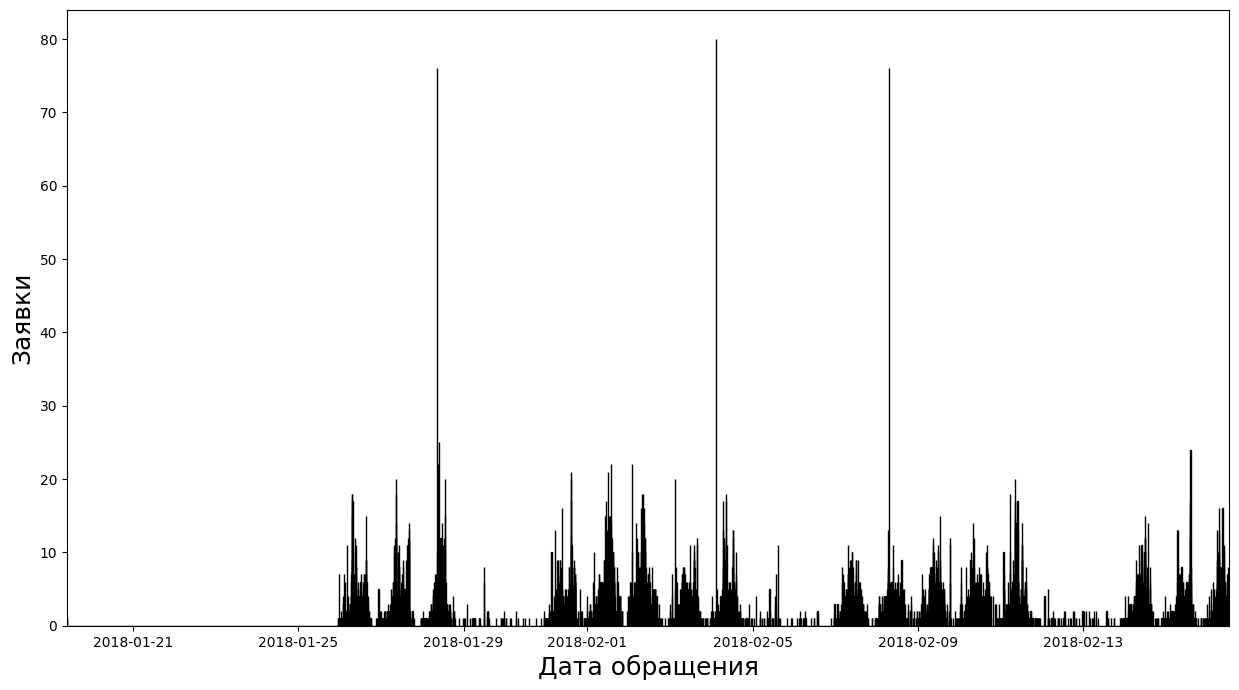

In [144]:
plt.figure(figsize=(15, 8))
plt.hist(train['Дата обращения'], color = 'blue', edgecolor = 'black',
         bins = int(len(train)/1))
plt.xlabel('Дата обращения', size =18)
plt.ylabel('Заявки', size= 18)
plt.xlim([min(train['Дата обращения']), max(train['Дата обращения'])])
plt.show()

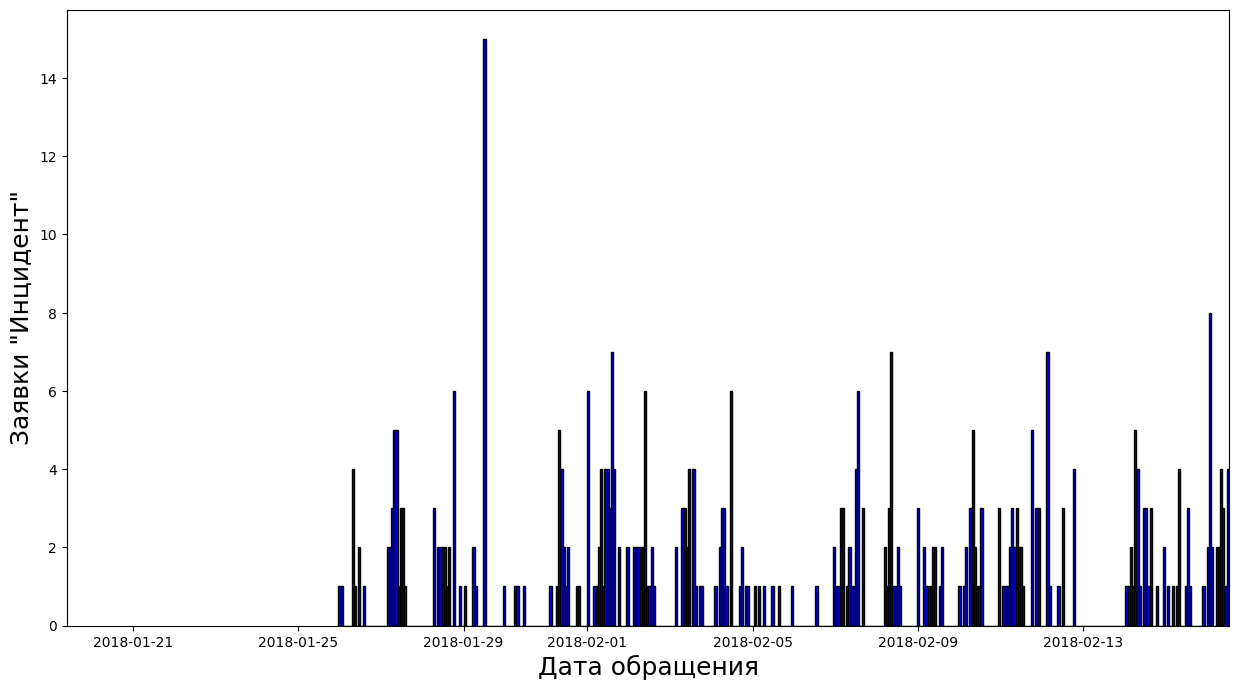

In [145]:
plt.figure(figsize=(15, 8))
plt.hist(train[train['Тип обращения итоговый'] == 'Инцидент']['Дата обращения'], color = 'blue', edgecolor = 'black',
         bins = int(len(train[train['Тип обращения итоговый'] == 'Инцидент'])/1))
plt.xlabel('Дата обращения', size =18)
plt.ylabel('Заявки "Инцидент"', size= 18)
plt.xlim([min(train['Дата обращения']), max(train['Дата обращения'])])
plt.show()

Определим всплеск нарушений как аномально большое количество обращений в последний минуту/час/3 часа/6 часов/12 часов

In [214]:
train['Открытых_обращений_минута'] = train['Дата обращения'].apply(lambda x: len(train[(abs(train['Дата обращения'] - x) < '1 minute')&(abs(train['Дата закрытия обращения'] - x) > '1 second')]))
train['Открытых_обращений_30_минут'] = train['Дата обращения'].apply(lambda x: len(train[(abs(train['Дата обращения'] - x) < '30 minutes')&(abs(train['Дата закрытия обращения'] - x) > 0)]))
train['Открытых_обращений_час'] = train['Дата обращения'].apply(lambda x: len(train[(abs(train['Дата обращения'] - x) < '1 hour')&(abs(train['Дата закрытия обращения'] - x) > 0)]))
train['Открытых_обращений_3_часа'] = train['Дата обращения'].apply(lambda x: len(train[(abs(train['Дата обращения'] - x) < '3 hours')&(abs(train['Дата закрытия обращения'] - x) > 0)]))
train['Открытых_обращений_6_часов'] = train['Дата обращения'].apply(lambda x: len(train[(abs(train['Дата обращения'] - x) < '6 hours')&(abs(train['Дата закрытия обращения'] - x) > 0)]))
train['Открытых_обращений_12_часов'] = train['Дата обращения'].apply(lambda x: len(train[(abs(train['Дата обращения'] - x) < '12 hours')&(abs(train['Дата закрытия обращения'] - x) > 0)]))
train['Открытых_обращений_день'] = train['Дата обращения'].apply(lambda x: len(train[(abs(train['Дата обращения'] - x) < '1 day')&(abs(train['Дата закрытия обращения'] - x) > 0)]))

TypeError: Invalid comparison between dtype=timedelta64[ns] and int

In [197]:
train

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,...,Открытых_обращений_час,Открытых_обращений_3_часа,Открытых_обращений_6_часа,Открытых_обращений_12_часа,Открытых_обращений_день,День_недели_обращения,Час_дня,Часть_дня,Открытых_обращений_6_часов,Открытых_обращений_12_часов
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,Тест,...,2,2,2,2,2,Friday,9,Morning,2,2
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,Тест,...,2,2,2,2,2,Friday,9,Morning,2,2
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51:00,2018-01-25 22:47:00,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,...,10,19,83,519,889,Thursday,22,Night,83,519
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50:00,2018-01-25 23:13:00,Инцидент,Инцидент,Выход из стоя БП. Заменён.,...,12,29,95,536,890,Thursday,23,Night,95,536
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,...,13,40,104,556,894,Thursday,23,Night,104,556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17:00,2018-02-16 13:02:00,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,...,62,207,461,721,977,Friday,13,Noon,461,721
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36:00,2018-02-16 13:07:00,Запрос,Запрос,Выполнено,...,62,193,450,720,970,Friday,13,Noon,450,720
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23:00,2018-02-16 13:08:00,Запрос,Запрос,Работы выполнены согласно заявке.,...,61,192,447,720,969,Friday,13,Noon,447,720
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24:00,2018-02-16 13:09:00,Запрос,Запрос,выполнено,...,61,188,446,720,969,Friday,13,Noon,446,720


In [198]:
train['Открытых_обращений_минута'].value_counts()

Открытых_обращений_минута
1     4339
2     4090
3     2190
4     1616
6      720
5      620
7      266
8      224
10     150
9      117
79      79
71      71
65      65
14      56
12      48
18      36
13      26
22      22
21      21
20      20
16      16
11      11
Name: count, dtype: int64

In [199]:
train['Открытых_обращений_30_минут'].value_counts()

Открытых_обращений_30_минут
66     241
70     229
68     214
63     199
65     198
      ... 
200      1
202      1
195      1
161      1
193      1
Name: count, Length: 210, dtype: int64

In [200]:
train['Открытых_обращений_час'].value_counts()

Открытых_обращений_час
109    169
151    161
150    156
141    152
149    145
      ... 
326      1
335      1
262      1
317      1
302      1
Name: count, Length: 337, dtype: int64

In [201]:
train['Открытых_обращений_3_часа'].value_counts()

Открытых_обращений_3_часа
387    105
385     91
353     86
166     85
396     83
      ... 
628      1
103      1
759      1
545      1
603      1
Name: count, Length: 742, dtype: int64

In [202]:
train['Открытых_обращений_6_часов'].value_counts()

Открытых_обращений_6_часов
604    104
484     97
941     97
692     95
647     86
      ... 
841      1
91       1
69       1
187      1
319      1
Name: count, Length: 1012, dtype: int64

In [203]:
train['Открытых_обращений_12_часов'].value_counts()

Открытых_обращений_12_часов
1005    377
881     308
1006    252
785     227
1009    217
       ... 
690       1
1146      1
1128      1
714       1
707       1
Name: count, Length: 739, dtype: int64

In [204]:
train['Открытых_обращений_день'].value_counts()

Открытых_обращений_день
1669    86
1678    83
1586    78
1838    76
2406    75
        ..
2376     1
841      1
2360     1
2337     1
977      1
Name: count, Length: 1647, dtype: int64

In [205]:
train.loc[train['Открытых_обращений_минута'] > 30, 'Тип обращения итоговый'].value_counts()

Тип обращения итоговый
Запрос    215
Name: count, dtype: int64

In [213]:
train.loc[train['Открытых_обращений_30_минут'] > 100, 'Тип обращения итоговый'].value_counts()

Тип обращения итоговый
Запрос      3688
Инцидент      60
Name: count, dtype: int64

In [209]:
train.loc[train['Открытых_обращений_час'] > 30, 'Тип обращения итоговый'].value_counts()

Тип обращения итоговый
Запрос      13542
Инцидент      295
Name: count, dtype: int64

In [210]:
train.loc[train['Открытых_обращений_3_часа'] > 30, 'Тип обращения итоговый'].value_counts()

Тип обращения итоговый
Запрос      14166
Инцидент      346
Name: count, dtype: int64

In [211]:
train.loc[train['Открытых_обращений_6_часов'] > 30, 'Тип обращения итоговый'].value_counts()

Тип обращения итоговый
Запрос      14285
Инцидент      364
Name: count, dtype: int64

In [212]:
train.loc[train['Открытых_обращений_12_часов'] > 30, 'Тип обращения итоговый'].value_counts()

Тип обращения итоговый
Запрос      14372
Инцидент      402
Name: count, dtype: int64

In [ ]:
train.loc[train['Открытых_обращений_12_часов'] > 30, 'Тип обращения итоговый'].value_counts()

Анализируем дни недели обращений

In [168]:
train['День_недели_обращения'] = train['Дата обращения'].apply(lambda x: x.day_name())

In [170]:
train['День_недели_обращения'].value_counts()

День_недели_обращения
Friday       3611
Thursday     2835
Sunday       2818
Saturday     2721
Wednesday    2578
Monday        158
Tuesday        82
Name: count, dtype: int64

In [178]:
train.loc[train['Тип обращения итоговый'] == 'Инцидент', 'День_недели_обращения'].value_counts()

День_недели_обращения
Wednesday    75
Thursday     73
Sunday       71
Friday       70
Saturday     68
Monday       42
Tuesday       6
Name: count, dtype: int64

Анализируем часть дня обращений

In [171]:
train['Час_дня'] = train['Дата обращения'].apply(lambda x: x.hour)

In [172]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [173]:
train['Часть_дня'] = train['Час_дня'].apply(f)

In [175]:
train['Часть_дня'].value_counts()

Часть_дня
Early Morning    4823
Morning          4712
Noon             3201
Late Night       1523
Eve               359
Night             185
Name: count, dtype: int64

In [181]:
train.loc[train['Тип обращения итоговый'] == 'Инцидент', 'Часть_дня'].value_counts()

Часть_дня
Morning          118
Early Morning    114
Late Night        65
Noon              56
Night             26
Eve               26
Name: count, dtype: int64

Анализируем 

In [177]:
pd.crosstab(train['Сервис'], train['День_недели_обращения'], rownames=['Сервис'], colnames=['День_недели_обращения']).sort_values('Friday', ascending=False)

День_недели_обращения,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Сервис,,,,,,,
АРМ,833,5,658,729,561,10,638
Сервис7,451,10,268,284,324,12,397
Сервис22,372,2,287,255,385,4,262
Сервис18,225,0,144,131,147,1,138
Сервис2,211,0,163,145,165,2,122
...,...,...,...,...,...,...,...
Сервис340,0,0,0,0,0,0,1
Сервис337,0,0,0,0,1,0,0
Сервис336,0,0,0,1,0,0,0


In [217]:
train[train['Сервис'] == "АРМ"]

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,...,Открытых_обращений_час,Открытых_обращений_3_часа,Открытых_обращений_6_часа,Открытых_обращений_12_часа,Открытых_обращений_день,День_недели_обращения,Час_дня,Часть_дня,Открытых_обращений_6_часов,Открытых_обращений_12_часов
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,Тест,...,2,2,2,2,2,Friday,9,Morning,2,2
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,Тест,...,2,2,2,2,2,Friday,9,Morning,2,2
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50:00,2018-01-25 23:13:00,Инцидент,Инцидент,Выход из стоя БП. Заменён.,...,12,29,95,536,890,Thursday,23,Night,95,536
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,...,13,40,104,556,894,Thursday,23,Night,104,556
5,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51:00,2018-01-25 23:39:00,Запрос,Запрос,Доступ заблокирован,...,13,40,104,556,894,Thursday,23,Night,104,556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,Настройка клиентских рабочих мест Система46,АРМ,3-Низкий,Закрыт,ФГ130,2018-02-21 13:38:00,2018-02-16 12:23:00,Запрос,Запрос,Выполнено.,...,106,248,542,728,1023,Friday,12,Morning,542,728
14757,Настройка клиентских рабочих мест Система46,АРМ,3-Низкий,Закрыт,ФГ130,2018-02-21 13:38:00,2018-02-16 12:23:00,Запрос,Запрос,Выполнено.,...,106,248,542,728,1023,Friday,12,Morning,542,728
14762,Письмо Random7467Заявка,АРМ,3-Низкий,Закрыт,ФГ79,2018-02-21 13:42:00,2018-02-16 12:27:00,Запрос,Запрос,Исполнено.,...,105,244,530,727,1018,Friday,12,Morning,530,727
14793,Запрос на организацию БРМ,АРМ,3-Низкий,Закрыт,ФГ751,2018-03-14 06:36:00,2018-02-16 12:57:00,Запрос,Запрос,Работы по обращению выполнены,...,69,209,484,723,987,Friday,12,Morning,484,723
